In [2]:
import dask.dataframe as dd
import dask.array as da
import dask_ml.preprocessing as dmp
import dask_ml.model_selection as dms


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import neattext.functions as nfx
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer



In [5]:
dask = dd.read_csv("./data/Suicide_Detection.csv")
dask = dask.drop('Unnamed: 0', axis = 1)

dask.head()


,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


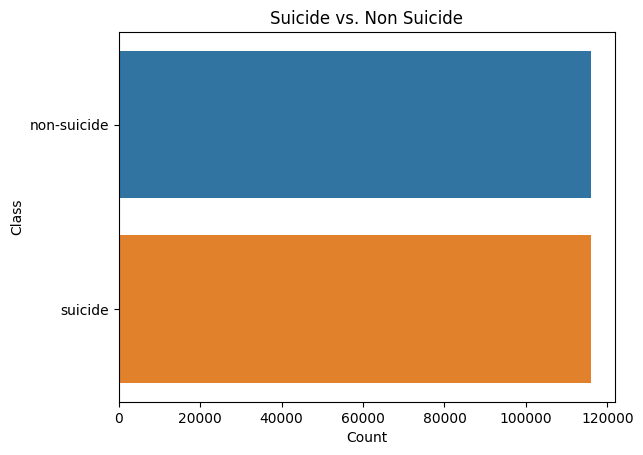

In [6]:
class_counts = dask['class'].value_counts().compute()

# Create a bar plot of the value counts using Seaborn
sns.barplot(x=class_counts.values, y=class_counts.index)

# Add a title, x-label, and y-label to the plot
plt.title('Suicide vs. Non Suicide')
plt.xlabel('Count')
plt.ylabel('Class')

# Show the plot
plt.show()

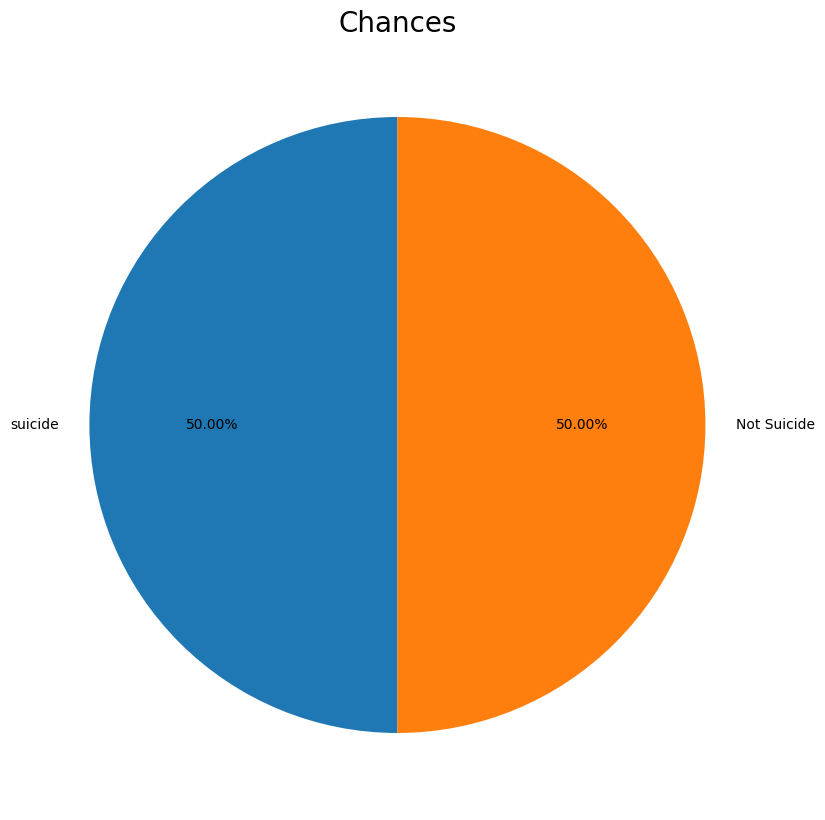

In [7]:
plt.figure(figsize=(12,10))
plt.pie(class_counts.values, startangle=90, autopct='%0.2f%%', labels=['suicide','Not Suicide'])
plt.title('Chances',fontdict={'size':20})
plt.show()

In [8]:
def clean_text(text):
    text_length=[]
    cleaned_text=[]
    lemmatizer = WordNetLemmatizer()
    for sent in tqdm(text):
        sent=sent.lower()
        sent=nfx.remove_special_characters(sent)
        sent=nfx.remove_stopwords(sent)
        sent = nfx.remove_emojis(sent)
        words = nltk.word_tokenize(sent)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        sent = ' '.join(lemmatized_words)
        text_length.append(len(sent.split()))
        cleaned_text.append(sent)
    return cleaned_text,text_length

In [9]:
train_data,test_data=dms.train_test_split(dask,test_size=0.2,random_state=10, shuffle=True)


In [12]:
cleaned_train_text,train_text_length=clean_text(train_data.text.compute())
cleaned_test_text,test_text_length=clean_text(test_data.text.compute())



100%|██████████| 46578/46578 [00:29<00:00, 1578.25it/s]


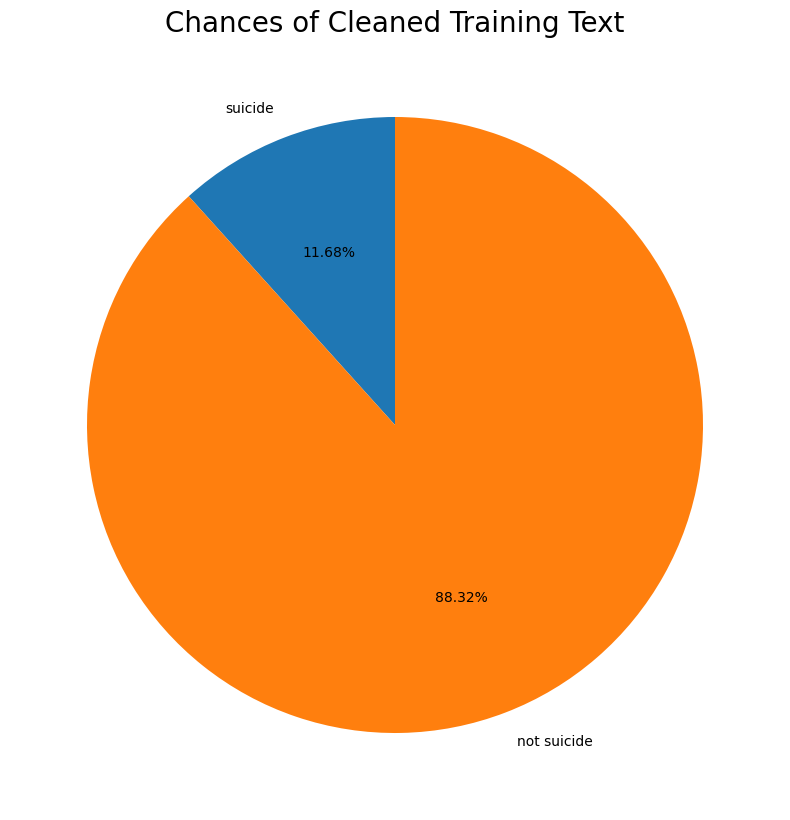

In [23]:
# Count the number of texts containing the word "suicide" in the cleaned training data
suicide_count = sum("suicide" in text for text in cleaned_train_text)

# Count the number of texts not containing the word "suicide" in the cleaned training data
not_suicide_count = len(cleaned_train_text) - suicide_count

# Create a pie plot of the counts
plt.figure(figsize=(12,10))
plt.pie([suicide_count, not_suicide_count], startangle=90, autopct='%0.2f%%', labels=['suicide', 'not suicide'])
plt.title('Chances of Cleaned Training Text', fontdict={'size':20})
plt.show()

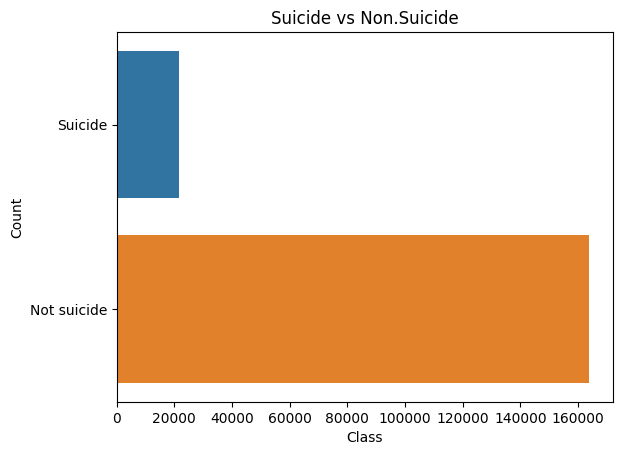

In [22]:
# Create a bar plot of the counts using Seaborn
sns.barplot(y=['Suicide', 'Not suicide'], x=[suicide_count, not_suicide_count])
plt.title('Suicide vs Non.Suicide')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

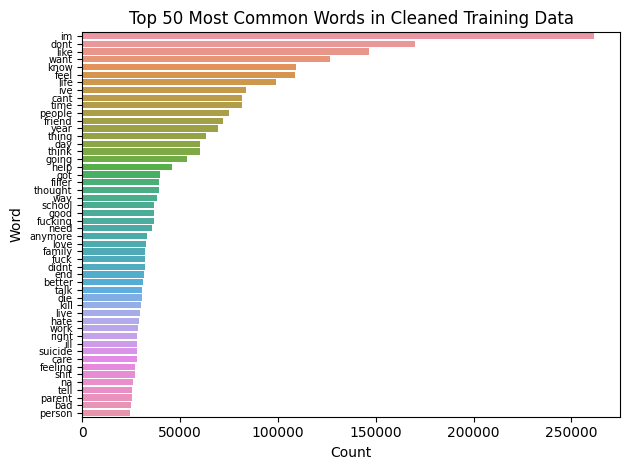

In [34]:
# Join all cleaned texts into one long string
all_text = ' '.join(cleaned_train_text)

# Tokenize the text using NLTK
words = nltk.tokenize.word_tokenize(all_text)

# Lemmatize the words using NLTK's WordNetLemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in words]

# Compute the frequency of each word using NLTK's FreqDist function
word_freq = nltk.FreqDist(words)

# Extract the 50 most common words
top_words = word_freq.most_common(50)

# Create a bar plot of the top 50 words using Seaborn
sns.barplot(x=[word[1] for word in top_words], y=[word[0] for word in top_words])
plt.title('Top 50 Most Common Words in Cleaned Training Data')
plt.xlabel('Count')
plt.ylabel('Word')
plt.yticks(fontsize=8)
plt.gca().tick_params(axis='y', which='major', labelsize=7)
plt.tight_layout()
plt.show()





